# Campeonato Kaggle 2025 - Módulo 3

In [2750]:
# Importanto bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Exploração dos dados

Nesta etapa foi feita a exploração das features do conjunto de dados.

In [2751]:
df = pd.read_csv('train.csv')

In [2752]:
# Colunas do dataframe
df.columns

Index(['id', 'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'labels'],
      dtype='object')

In [2753]:
# Primeiros 5 valores das linhas
df.head()

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels
0,719,10.42,13.09,8.98,12.72,4,3,4087500,3,1,...,0,0,1,1,0,0,0,0,1.0,0
1,429,3.79,3.79,NaN,NaN,21,1,45000000,0,0,...,0,0,0,0,0,1,0,0,1.0,1
2,178,0.71,2.28,1.95,2.28,5,2,5200000,2,1,...,0,1,1,0,1,0,0,0,1.0,0
3,197,3.00,5.00,9.62,10.39,16,2,14500000,2,0,...,0,0,0,1,0,1,0,0,2.0,1
4,444,0.66,5.88,6.21,8.61,29,5,70000000,4,1,...,0,0,0,0,1,1,1,1,2.8,1


In [2754]:
df['age_first_milestone_year'].value_counts()

age_first_milestone_year
0.00    29
1.00    18
2.00    18
3.00    17
4.00    14
        ..
4.32     1
0.32     1
2.02     1
8.59     1
0.14     1
Name: count, Length: 274, dtype: int64

In [2755]:
df.isnull().any()

id                          False
age_first_funding_year       True
age_last_funding_year        True
age_first_milestone_year     True
age_last_milestone_year      True
relationships               False
funding_rounds              False
funding_total_usd           False
milestones                  False
is_CA                       False
is_NY                       False
is_MA                       False
is_TX                       False
is_otherstate               False
category_code               False
is_software                 False
is_web                      False
is_mobile                   False
is_enterprise               False
is_advertising              False
is_gamesvideo               False
is_ecommerce                False
is_biotech                  False
is_consulting               False
is_othercategory            False
has_VC                      False
has_angel                   False
has_roundA                  False
has_roundB                  False
has_roundC    

In [2756]:
df['age_first_funding_year'].value_counts()

age_first_funding_year
0.00    38
0.75    11
0.67    10
2.00    10
0.25     8
        ..
6.04     1
2.95     1
1.92     1
2.17     1
2.72     1
Name: count, Length: 334, dtype: int64

In [2757]:
df['age_last_funding_year'].isnull().value_counts()

age_last_funding_year
False    637
True       9
Name: count, dtype: int64

In [2758]:
df['age_first_milestone_year'].isnull().value_counts()

age_first_milestone_year
False    508
True     138
Name: count, dtype: int64

In [2759]:
df['age_last_milestone_year'].isnull().value_counts()

age_last_milestone_year
False    535
True     111
Name: count, dtype: int64

## Limpeza e Tratamento de Valores Nulos

Nesta etapa foi realizada o tratamento das colunas que pssuíam valores nulos (NaN). 

In [2760]:
# Divisão da coluna age_first_funding_year, em first_funding (0 - não recebeu ou 1- recebeu)
df['first_funding'] = df["age_first_funding_year"].notnull().astype(int)

In [2761]:
# Divisão da coluna age_çast_funding_year, em last_funding (0 - não recebeu ou 1- recebeu)
df['last_funding'] = df["age_last_funding_year"].notnull().astype(int)

In [2762]:
# Divisão da coluna age_last_milestone_year, em first_milestone (0 - não recebeu ou 1- recebeu)
df['first_milestone'] = df["age_first_milestone_year"].notnull().astype(int)

In [2763]:
# Divisão da coluna age_last_milestone_year, em last_milestone (0 - não recebeu ou 1- recebeu)
df['last_milestone'] = df["age_last_milestone_year"].notnull().astype(int)

In [2764]:
# Análise da nova coluna
df['first_funding'].value_counts()

first_funding
1    611
0     35
Name: count, dtype: int64

In [2765]:
# Substituindo NaNs das colunas por -1
df['age_first_funding_year'] = df['age_first_funding_year'].fillna(-1)
df['age_last_funding_year'] = df['age_last_funding_year'].fillna(-1)
df['age_first_milestone_year'] = df['age_first_milestone_year'].fillna(-1)
df['age_last_milestone_year'] = df['age_last_milestone_year'].fillna(-1)


In [2766]:
df.columns

Index(['id', 'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'labels',
       'first_funding', 'last_funding', 'first_milestone', 'last_milestone'],
      dtype='object')

In [2767]:
df['last_milestone'].value_counts()

last_milestone
1    535
0    111
Name: count, dtype: int64

## Codificação de Variáveis Categóricas

Descrever o que é a codificalção de variáveis categóricas, explicando que já foi realizada

In [2768]:
df['category_code'].unique()

array(['enterprise', 'advertising', 'photo_video', 'web', 'software',
       'games_video', 'mobile', 'sports', 'fashion', 'semiconductor',
       'security', 'biotech', 'hardware', 'public_relations', 'ecommerce',
       'other', 'social', 'cleantech', 'manufacturing', 'automotive',
       'network_hosting', 'messaging', 'music', 'travel', 'consulting',
       'search', 'finance', 'medical', 'analytics', 'real_estate',
       'education', 'health', 'news', 'transportation'], dtype=object)

## Formulação de hipóteses

### Hipótese 1 - Startups que possuem mais conexões tendem a atingir o sucesso

A primeira hipórtese criada diz respeito à coluna/ feature 'relationships', no que tange às conexões que uma startup possui até o momento. Segundo a hipótese levantada, startups que possuem maior quantidade de conexões tendem a possuírem sucesso no mercado, enqunato aquelas que não possuem grande quantidade de relacionamentos acabam fracassando.
Para analisar essa hipótese, foi feito o seguinte gráfico abaixo:

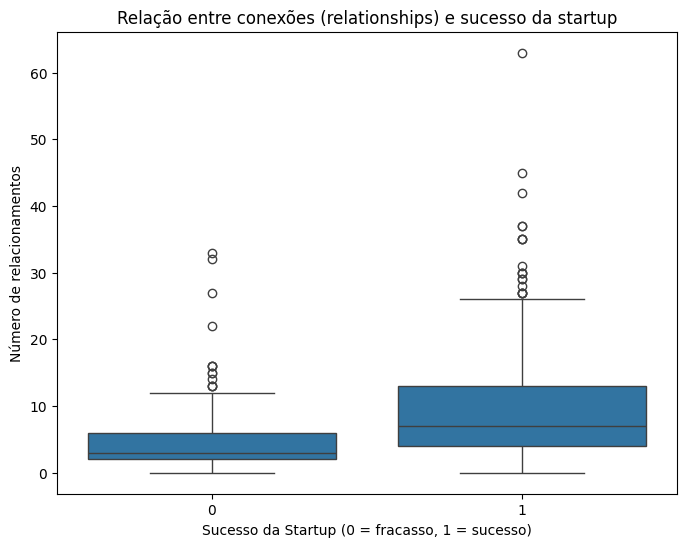

In [2769]:
plt.figure(figsize=(8,6))
sns.boxplot(x='labels', y='relationships', data=train)
plt.xlabel("Sucesso da Startup (0 = fracasso, 1 = sucesso)")
plt.ylabel("Número de relacionamentos")
plt.title("Relação entre conexões (relationships) e sucesso da startup")
plt.show()

Dessa forma, como pode ser observado no gráfic boxplot acima, a maior densidade de valores baixos está em startups fracassadas (0), podendo-se inferir, então, que aquelas startups que possuem poucos relacionamentos, geralmente abaixo de 10, tendem a fracassarem. Por outro lado, as startups que apresentaram quadro de sucesso no mercado tendem possuir maiores quantidades de relacionamentos (geralmente entre 5 e 15). 
Assim, a hipótes prova-se como verdadeira, pois, de fato, as quantidade de conexões que uma startup faz infuênica no seu sucesso final.

### Hipótese 2 - Startups que nunca captaram recursos tendem a não possuir sucesso no mercado

A segunda hipótese diz respeito a captação de recursos por uma startup e infere que aquelas startups que nunca captaram recursos tendem a fracassar no mercado. Dessa forma, para analisar a veracidade da hipótese levantada, foi feito o seguinte gráfico countplot:

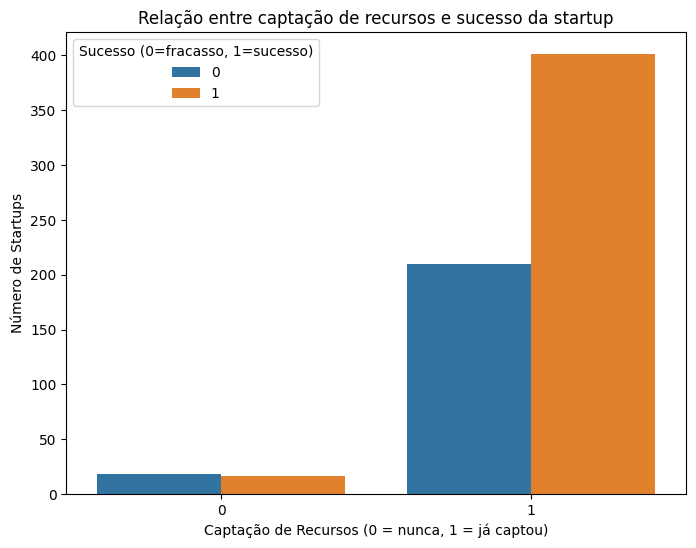

In [2770]:
plt.figure(figsize=(8,6))
sns.countplot(x='first_funding', hue='labels', data=df)
plt.xlabel("Captação de Recursos (0 = nunca, 1 = já captou)")
plt.ylabel("Número de Startups")
plt.title("Relação entre captação de recursos e sucesso da startup")
plt.legend(title="Sucesso (0=fracasso, 1=sucesso)")
plt.show()


Como pode ser observado, há grande concentralção/ quantidade de startups que obtiveram sucesso - cores em laranja, e que essas startups estão concentradas, em sua mioria, em startupas que já captaram algum tipo de recurso. Assim, pode-se inferir que a hipótese 2 é verdadeira, pois, startups que já captaram recursos tendem a possuir sucesso e, no caso contrário, startups que não captaram nenhum recurso, tem chances mais elevadas de não serem bem sucediadas nomercado.

### Hipótese 3 - Startups que nunca tiveram marcos relevantes tendem a fracassar no mercado

A terceira hipótese diz respeito aos marcos relevantes realizados pela startup, e infere que aquelas startups que não realizaram marcos relevantes tendem a fracassar no mercado. Para testá-la foi usado novamento o gráfico boxplot, que pode ser observado abaixo:

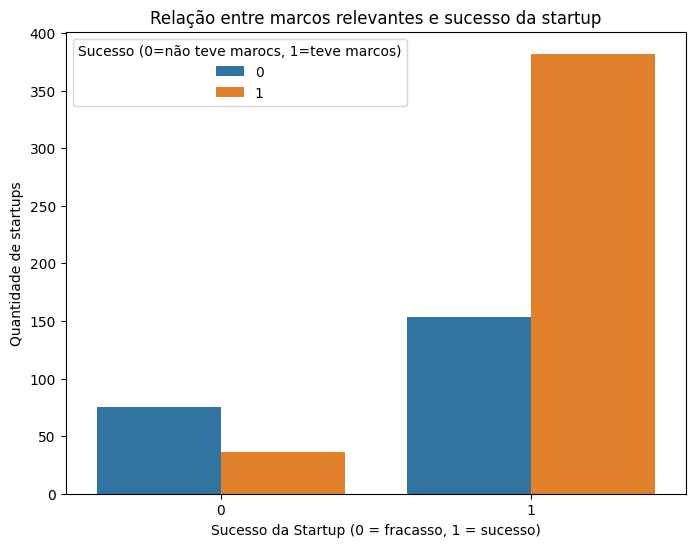

In [2771]:
plt.figure(figsize=(8,6))
sns.countplot(x='last_milestone', hue='labels', data=df)
plt.xlabel("Sucesso da Startup (0 = fracasso, 1 = sucesso)")
plt.ylabel("Quantidade de startups")
plt.title("Relação entre marcos relevantes e sucesso da startup")
plt.legend(title="Sucesso (0=não teve marocs, 1=teve marcos)")
plt.show()

Como pode ser observado, apesar de haver startups que tiveram marcos relevantes mas fracassaram no mercado, parte significativa das startups que tiveram marcos importantes está concentrada nos casos de sucesso. Logo, a hipótese 3 também é validada como verdadeira.

## Seleção de Features

Para selecionar com mais precisão as features que seriam utilizadas no treino e teste, foi utilizado um parâmetro de correlação chamado 'spearman', que observa a relação de cada uma das variáveis do conjunto com a coluna alvo (labels) e depois foi gerado um mapa de calor.

In [2772]:
# Seleção de colunas
columns = ['age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'labels',
       'first_funding', 'last_funding', 'first_milestone', 'last_milestone']

# Correlação urilizando spearman - observa a relação de cada variável com a coluna alvo
corr = df[columns].corr('spearman')

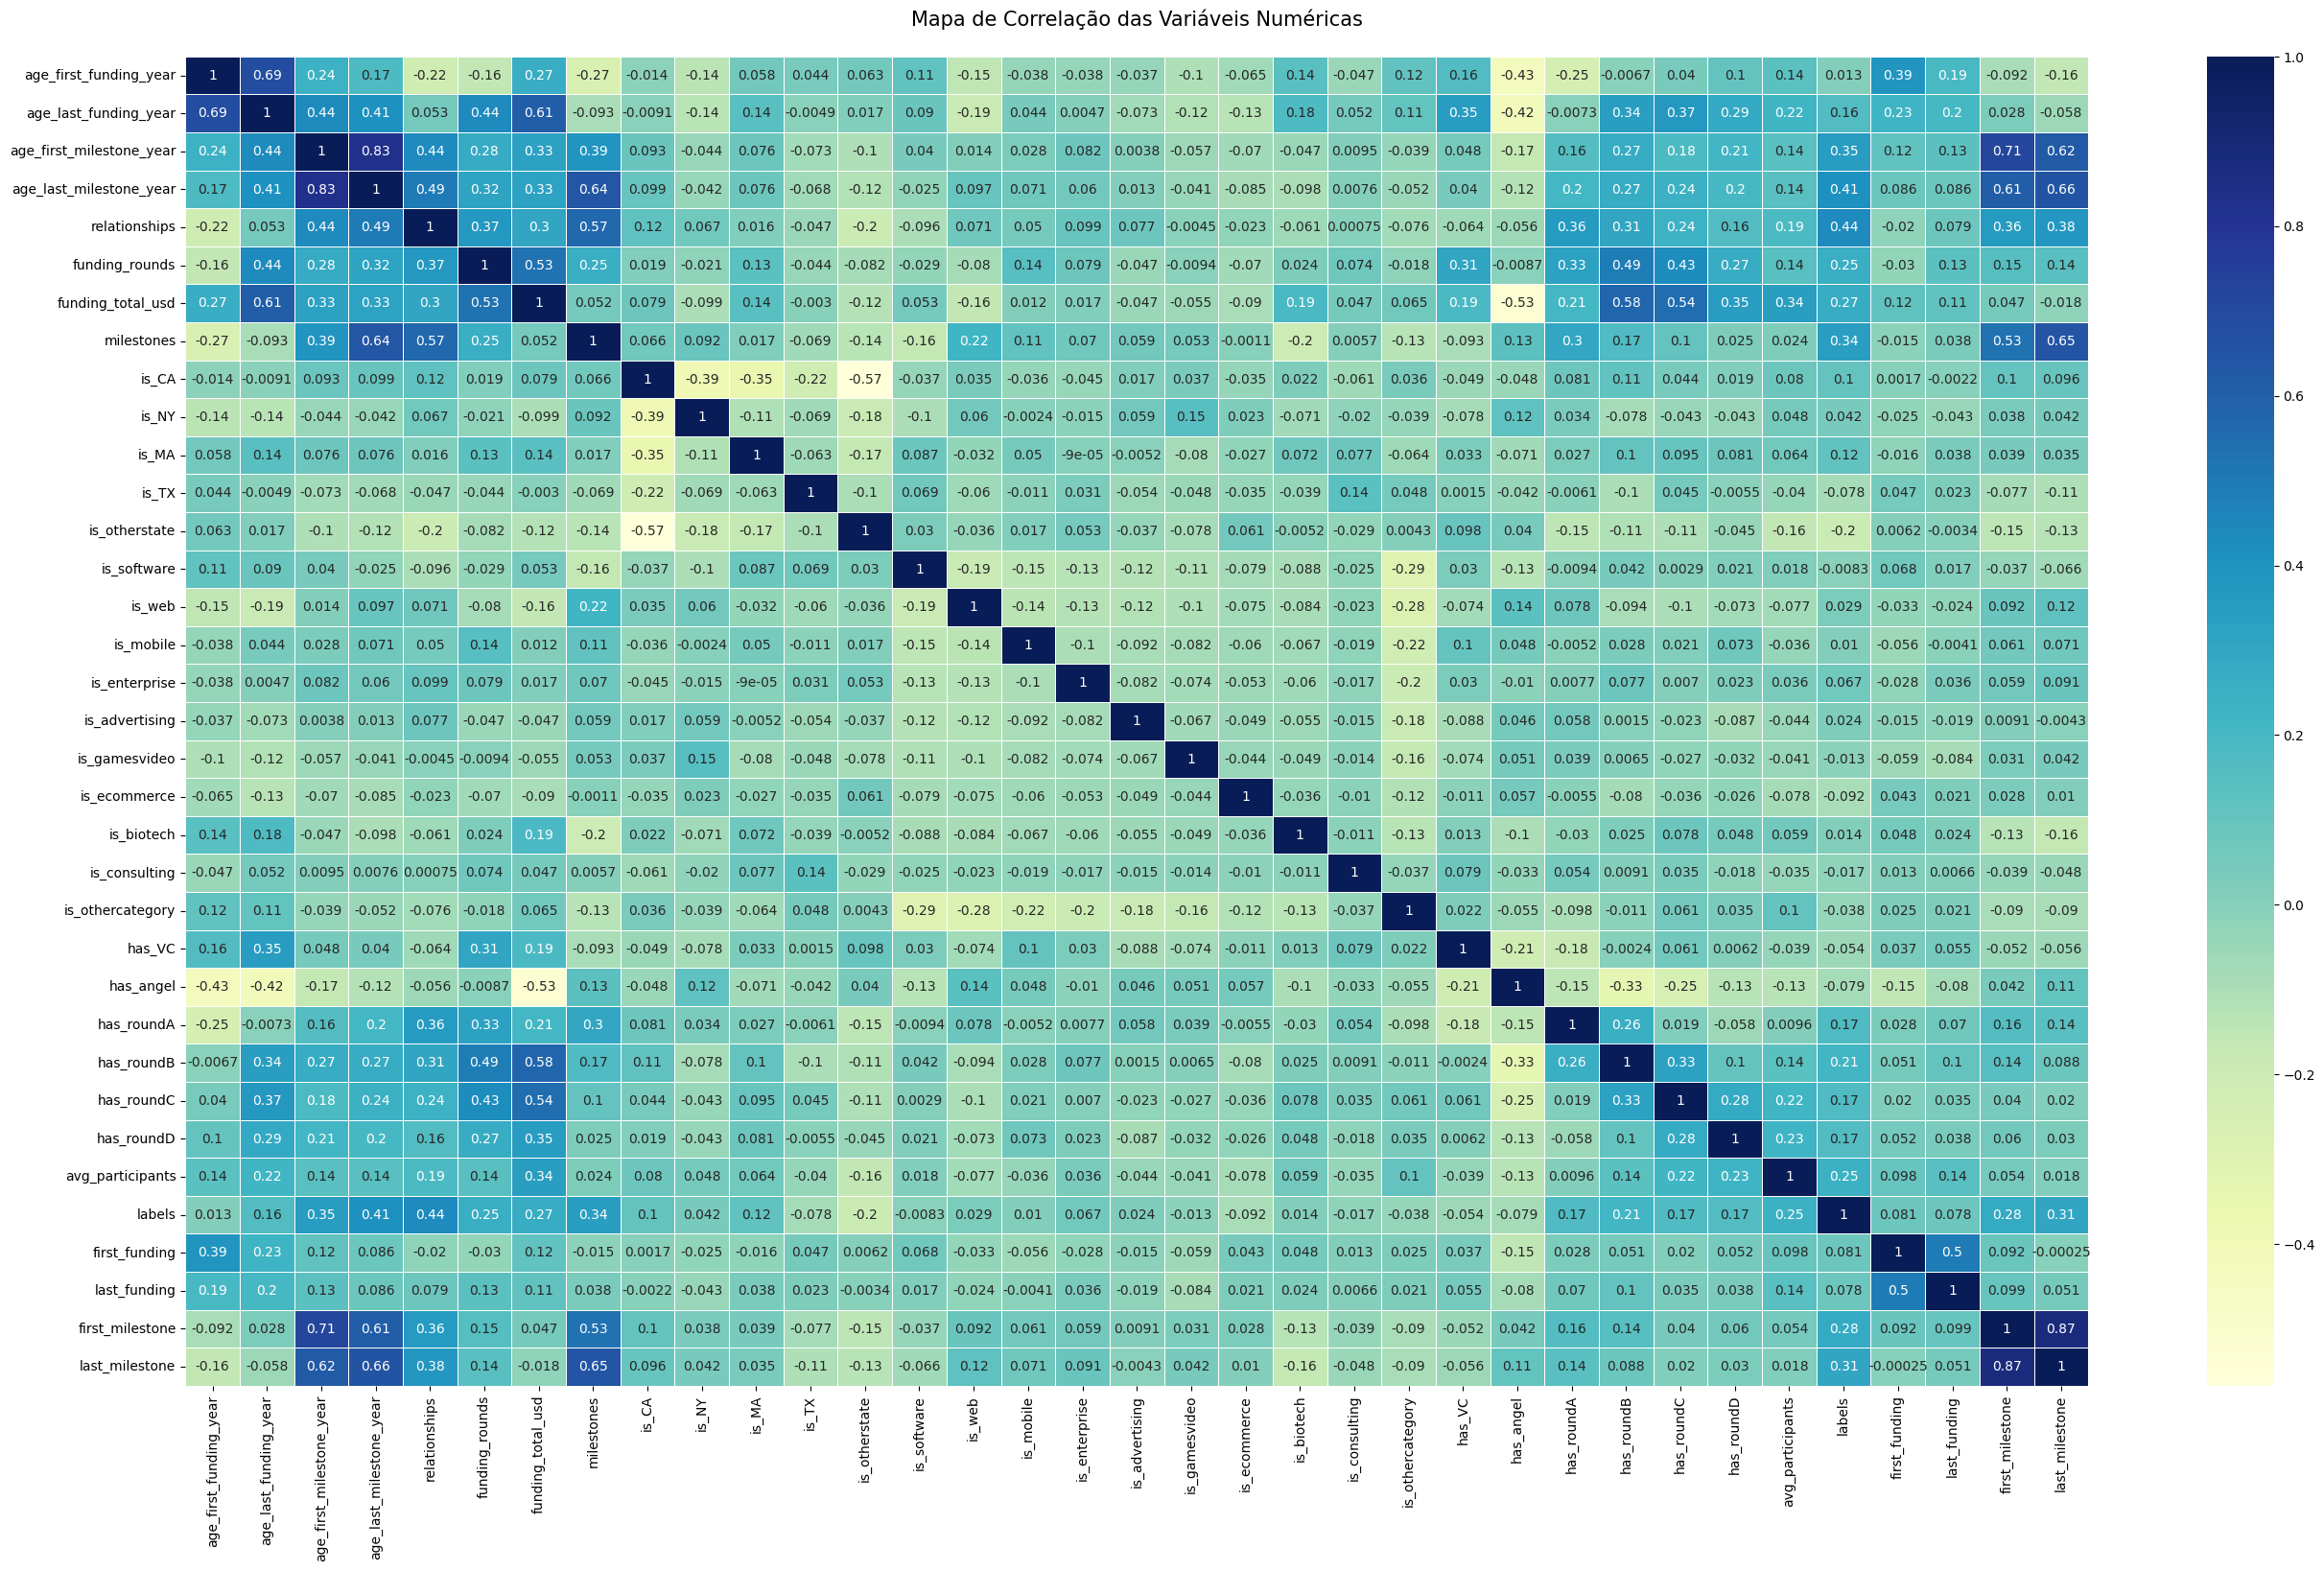

In [2773]:
# Heatmap com correlações
import matplotlib.pyplot as plt
plt.figure(figsize = (32, 18))
sns.heatmap(corr, annot = True, cmap = "YlGnBu", linewidths=0.6)
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

## Construção e avaliação do modelo

Nessa etapa foi feito o treinamento do modelo utilizando o método Random Forest, que utiliza um algorítimo para testar múltiplas árvores de decisão que são criadas usando diferentes subconjuntos aleatórios de dados e recursos. Cada árvore de decisão atua como um especialista, dando sua opinião sobre como classificar os dados. As previsões são feitas calculando a previsão para cada árvore de decisão e, em seguida, tomando o resultado mais popular.

### Construção do modelo

In [2774]:
# Importação de pacotes para modelagem
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [2775]:
# Divisão dos dados de treinamento
x_train = df.drop(columns=['labels', 'category_code'])

y_train = df['labels']

In [2776]:
# Divisão dos dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, random_state=42, test_size=0.3)

In [2777]:
# Treinamento random forest
# rf = RandomForestClassifier(random_state=42, n_estimators=300, max_depth=10, max_features='sqrt', min_samples_split=5)

rf = RandomForestClassifier(criterion='gini', random_state=42, n_estimators=86, max_depth=8, max_features='sqrt', min_samples_split=2, min_samples_leaf=1)

rf.fit(x_train, y_train)

,n_estimators,86
,criterion,'gini'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [2778]:
# Predição de valores
y_pred = rf.predict(x_test)

### Reasutlados das métricas para o modelo

In [2779]:
# Analisando métricas - Acurácia, precisão e recall
confusion_matrix =  confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Matriz de confusão:', confusion_matrix)
print('Acurácia:', accuracy)
print('Precisão:', precision)
print('Recall:', recall)

Matriz de confusão: [[ 31  38]
 [  8 117]]
Acurácia: 0.7628865979381443
Precisão: 0.7548387096774194
Recall: 0.936


### Importação dos dados de teste

In [2780]:
df_test = pd.read_csv('test.csv')

#### Limpeza e tratamento de valores nulos

In [2781]:
# Divisão da coluna age_first_funding_year, em first_funding (0 - não recebeu ou 1- recebeu)
df_test['first_funding'] = df_test["age_first_funding_year"].notnull().astype(int)

# Divisão da coluna age_first_funding_year, em first_funding (0 - não recebeu ou 1- recebeu)
df_test['last_funding'] = df_test["age_last_funding_year"].notnull().astype(int)

# Divisão da coluna age_first_milestone_year, em first_milestone (0 - não recebeu ou 1- recebeu)
df_test['first_milestone'] = df_test["age_first_milestone_year"].notnull().astype(int)

# Divisão da coluna age_last_milestone_year, em last_milestone (0 - não recebeu ou 1- recebeu)
df_test['last_milestone'] = df_test["age_last_milestone_year"].notnull().astype(int)

In [2782]:
# Substituindo NaNs das colunas por -1
df_test['age_first_funding_year'] = df_test['age_first_funding_year'].fillna(-1)
df_test['age_last_funding_year'] = df_test['age_last_funding_year'].fillna(-1)
df_test['age_first_milestone_year'] = df_test['age_first_milestone_year'].fillna(-1)
df_test['age_last_milestone_year'] = df_test['age_last_milestone_year'].fillna(-1)

### Arquivo csv para submissão

In [2783]:
# Divisão dos dados de teste
x_test = df_test.drop(columns=['category_code'])

y_pred = rf.predict(x_test)

submission = pd.DataFrame({'id': df_test['id'], 'count': y_pred})
submission['count'] = submission['count'].astype(int)
submission.to_csv('submissionFinal.csv', index=False)
submission.head()

,id,count
0,70,1
1,23,0
2,389,1
3,872,1
4,920,0


### Finetuning de Hiperparâmetros

Nessa parte, foi feito o ajuste de hiperparâmetros utilizando o método RandomizedSearchCV, do sklearn.

In [2784]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(x_train, y_train)
print("Melhores parâmetros:", grid.best_params_)
print("Melhor acurácia:", grid.best_score_)

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Classificador
rf = RandomForestClassifier()

# Selecionando melhores hiperparâmetros
rand_search = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter=5, cv=5)
            
rand_search.fit(x_train, y_train)

" from sklearn.model_selection import RandomizedSearchCV, train_test_split\nfrom scipy.stats import randint\n\nparam_dist = {'n_estimators': randint(50,500),\n              'max_depth': randint(1,20)}\n\n# Classificador\nrf = RandomForestClassifier()\n\n# Selecionando melhores hiperparâmetros\nrand_search = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter=5, cv=5)\n\nrand_search.fit(x_train, y_train) "

In [ ]:
# Variável para o melhor modelo
best_rf = rand_search.best_estimator_

# Melhores hiperparâmetors
print('Best hyperparameters:',  rand_search.best_params_)

" # Variável para o melhor modelo\nbest_rf = rand_search.best_estimator_\n\n# Melhores hiperparâmetors\nprint('Best hyperparameters:',  rand_search.best_params_) "